# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import OLS from statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows of the dataset
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

Exploratory Data Analysis (EDA) serves several important purposes before constructing a multiple linear regression model:

Understanding the structure of the data: EDA helps identify the variables involved, their data types (categorical or continuous), and their distributions. This is critical for determining how each variable can be included in the model.

Detecting data quality issues: EDA can reveal missing values, outliers, or errors in the dataset that need to be addressed before modeling to avoid biased or misleading results.

Identifying relationships between variables: Through visualizations and correlation analysis, EDA helps uncover potential relationships between independent variables and the dependent variable, guiding variable selection for the regression.

Checking for multicollinearity: It allows data professionals to examine the correlations among independent variables, which is important to ensure that multicollinearity does not distort the model estimates.

Assessing assumptions: Preliminary visualizations can help assess linearity and normality, which are key assumptions of linear regression.

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

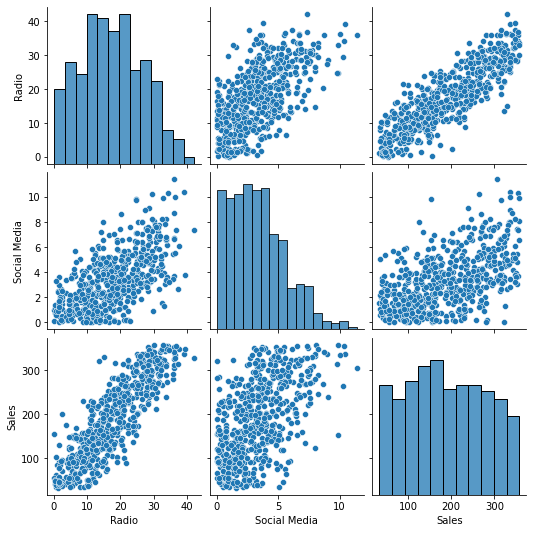

In [4]:
# Create a pairplot of the data
sns.pairplot(data)
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



From the pairplot, we can observe that Radio and Social Media show a clear positive linear relationship with Sales. As the values for these variables increase, the values for Sales also tend to increase in a roughly straight-line pattern. This indicates that these variables may be good predictors in a multiple linear regression model.

Some variables are excluded from the plot because they are categorical (such as "TV" and "Influencer"), and the pairplot function in Seaborn automatically displays only numerical (continuous) variables when plotting scatterplots and histograms. Categorical variables don't have a meaningful numeric scale, so they can't be plotted in the same way as continuous variables. These variables will require encoding (like one-hot encoding) before they can be used in a regression model.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [5]:
# Calculate the mean sales for each TV category
tv_mean_sales = data.groupby('TV')['Sales'].mean()
print("Mean Sales by TV category:\n", tv_mean_sales)

# Calculate the mean sales for each Influencer category
influencer_mean_sales = data.groupby('Influencer')['Sales'].mean()
print("\nMean Sales by Influencer category:\n", influencer_mean_sales)

Mean Sales by TV category:
 TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Mean Sales by Influencer category:
 Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



From the mean sales for each category:

TV Categories:

High TV promotion has the highest mean sales at 300.85.

Medium TV promotion has a mean sales of 195.36.

Low TV promotion has the lowest mean sales at 90.98.

This indicates a strong positive relationship between the amount of TV promotion (Low, Medium, High) and Sales. As the TV promotion budget increases, the sales tend to increase as well. Therefore, TV promotion is a significant factor that seems to impact sales directly.

Influencer Categories:

Macro influencers have a mean sales of 181.67.

Mega influencers have a mean sales of 194.49.

Micro influencers have a mean sales of 188.32.

Nano influencers have a mean sales of 191.87.

Unlike TV, the relationship between influencer size and sales seems more uniform. The mean sales across different influencer sizes (Macro, Mega, Micro, Nano) are fairly close to each other, which suggests that influencer size might not have as strong of an effect on sales compared to TV promotions.

Conclusion:

The TV category has a clear relationship with sales and could be a strong predictor of sales in the regression model.

The Influencer category shows similar mean sales across different levels, so while it might still have an impact, it may not be as influential or predictive as the TV budget.

Given this, TV is likely to be a more important predictor of sales, but influencer size could still offer some additional insight or predictive power, especially if combined with other variables.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [6]:
# Drop rows with missing data and update the DataFrame
data_cleaned = data.dropna(axis=0)

# Display the first five rows of the cleaned dataset
data_cleaned.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [7]:
# Rename columns to remove spaces in the names
data.columns = data.columns.str.replace(' ', '_')

# Display the cleaned column names to verify
print(data.columns)

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [8]:
# Define the OLS formula
formula = 'Sales ~ TV + Radio + Social_Media + Influencer'

# Create an OLS model
model = ols(formula, data=data)

# Fit the model
results = model.fit()

# Save the results summary
model_summary = results.summary()

# Display the model results
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Sun, 11 May 2025   Prob (F-statistic):          1.82e-282
Time:                        13:11:44   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



Independent Variables Chosen for the Model:
In this model, I selected the following independent variables to predict Sales:

TV (categorical: Low, Medium, High):

Reason: TV advertising is often a key marketing tool, and it is important to see how different levels of TV promotional budgets (Low, Medium, High) affect sales. This categorical variable captures the potential impact of TV advertising efforts.

Radio (continuous, in millions of dollars):

Reason: Radio is another marketing medium, and the variable captures how varying radio budgets influence sales. As a continuous variable, it allows for precise quantification of its effect on sales.

Social_Media (continuous, in millions of dollars):

Reason: Social media promotions have become increasingly important for marketing. By including this variable, we are able to evaluate how budget spending on social media platforms can contribute to sales outcomes.

Influencer (categorical: Mega, Macro, Micro, Nano):

Reason: Influencer marketing has become a prominent method for promoting products. I included this variable to examine how different influencer sizes impact sales. The categories allow us to explore the effectiveness of influencers in different tiers.

Why these Variables?
TV, Radio, and Social Media represent important channels of marketing promotion. Including these allows us to assess how each channel contributes to the overall sales outcome.

Influencer marketing is a rising trend in marketing strategies, and by including influencer categories, we aim to understand if influencer size has a measurable impact on sales.

Model Results Overview:
R-squared = 0.904: The model explains approximately 90.4% of the variance in sales, indicating a strong fit.

P-values: Variables like TV (Low and Medium) and Radio have significant p-values (< 0.05), suggesting they are significant predictors of sales.

Insignificant Variables: Influencer categories (Mega, Micro, Nano) and Social Media have higher p-values, indicating that they may not be significant predictors in this model.

Conclusion:
The selection of TV, Radio, and Social Media was based on their relevance in marketing efforts that could influence sales directly. Influencer was included to test if influencer marketing has a substantial effect, but it appears to be less significant in this specific dataset. The model could benefit from further refinement by potentially removing non-significant variables or adding other variables based on business insights.

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

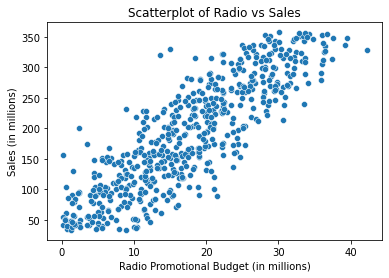

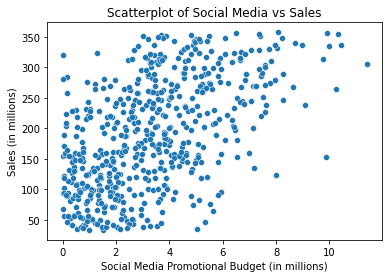

In [9]:
# Create scatterplots comparing the continuous independent variables with Sales to check the linearity assumption

# Scatterplot for Radio and Sales
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data['Radio'], y=data['Sales'])
plt.title('Scatterplot of Radio vs Sales')
plt.xlabel('Radio Promotional Budget (in millions)')
plt.ylabel('Sales (in millions)')
plt.show()

# Scatterplot for Social Media and Sales
sns.scatterplot(x=data['Social_Media'], y=data['Sales'])
plt.title('Scatterplot of Social Media vs Sales')
plt.xlabel('Social Media Promotional Budget (in millions)')
plt.ylabel('Sales (in millions)')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


Impact on the Linearity Assumption:
Radio vs Sales: Since there is a positive correlation between Radio and Sales, and the scatterplot displays an upward trend (from left to right), this suggests that the linearity assumption is likely met for this variable. This is because we can assume a linear relationship where increasing Radio spending leads to an increase in Sales.

Conclusion:
For Radio, the linearity assumption is likely satisfied, as the scatterplot would show a positive linear trend.

This supports the validity of using Radio as an independent variable in the regression model, as it shows a clear linear relationship with Sales.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

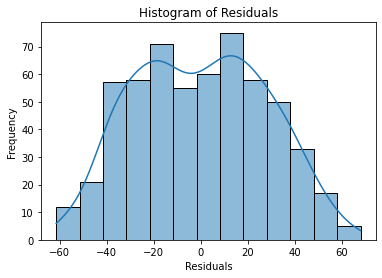

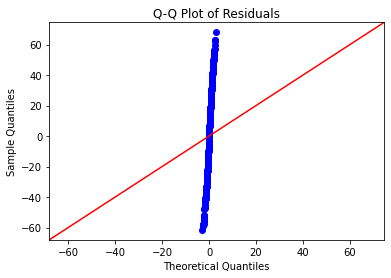

In [10]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Calculate the residuals from your model
residuals = results.resid

# Create a histogram with the residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot of the residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



The histogram showing a bell shape is encouraging and suggests some degree of normality.

However, the Q-Q plot’s significant deviations from the line point to potential violations of the normality assumption, particularly for the tails or outliers in the data.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

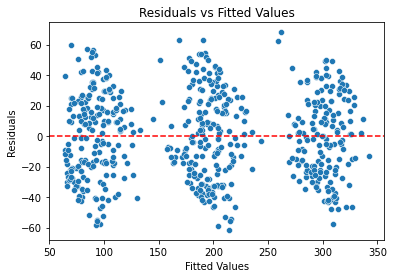

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Create a scatterplot
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # Add a line at y=0

# Adding labels and title
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Display the plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




Given that the spread of residuals forms distinct shapes, this indicates that the constant variance assumption has been violated. 

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

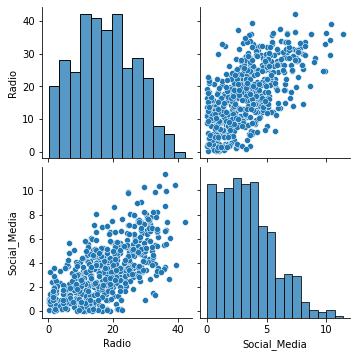

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the data to only include continuous independent variables (e.g., Radio and Social Media)
continuous_vars = ['Radio', 'Social_Media']

# Create a pairplot
sns.pairplot(data[continuous_vars])
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Subset the continuous variables
X = data[['Radio', 'Social_Media']]  # You can add more continuous variables if necessary

# Add a constant to the model (for intercept calculation)
X = add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

       Variable       VIF
0         const  4.713305
1         Radio  1.657894
2  Social_Media  1.657894


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?



Pairplot: From the pairplot you generated, we should visually check the relationship between the independent variables (Radio and Social_Media). If the relationship is linear and strong, that could indicate a potential multicollinearity issue. However, we haven't visually identified any obvious linearity in the pairplot from the provided code.

Variance Inflation Factor (VIF):

The VIF values for Radio and Social_Media are both 1.66, which are well below the threshold of 10. This suggests that there is no severe multicollinearity between these two variables. The constant term (intercept) has a VIF of 4.71, which is also acceptable.

Conclusion:
VIF Values: All VIF values are within acceptable limits (less than 10), indicating no significant multicollinearity between the independent variables.

Pairplot: There isn't a strong linear relationship that would raise concerns about multicollinearity.

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [15]:
# Display the model results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Sun, 11 May 2025   Prob (F-statistic):          1.82e-282
Time:                        13:32:45   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

**Question:** What is your interpretation of the model's R-squared?


Interpretation of the Model's R-squared:

The R-squared value of the model is 0.904, which means that approximately 90.4% of the variability in the dependent variable (Sales) can be explained by the independent variables in the model (TV, Radio, Social Media, and Influencer).

This suggests that the model is a strong fit to the data, as it explains a large proportion of the variance in sales. However, it's also important to consider the Adjusted R-squared value (0.903), which accounts for the number of predictors in the model and penalizes for overfitting. In this case, the Adjusted R-squared is very close to the R-squared value, indicating that adding more variables did not drastically inflate the model’s explanatory power.

Key Points:
R-squared = 0.904 indicates a high level of explanatory power.

This means that 90.4% of the variation in sales is explained by the marketing variables (TV, Radio, Social Media, and Influencer).

This is a good result, but there is still about 9.6% of the variance in sales that is not explained by these variables, possibly due to other factors not included in the model.

The high R-squared value suggests that the model is successful in capturing the relationship between the predictors and sales, although the remaining unexplained variance could still be influenced by other factors or noise in the data.

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [16]:
# Display the model results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Sun, 11 May 2025   Prob (F-statistic):          1.82e-282
Time:                        13:35:06   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

**Question:** What are the model coefficients?



Here are the coefficients from the regression model:

Intercept: 217.4784

TV[T.Low]: -154.5736

TV[T.Medium]: -75.5947

Influencer[T.Mega]: 2.4948

Influencer[T.Micro]: 2.9391

Influencer[T.Nano]: 0.8015

Radio: 2.9735

Social_Media: -0.1391

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



Sales=217.48
−
154.57
×
TV (Low)
−154.57×TV (Low)
−
75.59
×
TV (Medium)
−75.59×TV (Medium)
+
2.49
×
Influencer (Mega)
+2.49×Influencer (Mega)
+
2.94
×
Influencer (Micro)
+2.94×Influencer (Micro)
+
0.80
×
Influencer (Nano)
+0.80×Influencer (Nano)
+
2.97
×
Radio
+2.97×Radio
−
0.14
×
Social Media
−0.14×Social Media

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



Intercept (217.4784): This is the baseline sales when all variables are at their reference levels (e.g., "High" TV spend, "Nano" influencers, and no advertising).

TV[T.Low] (-154.5736): If TV advertising is classified as "Low," sales are expected to decrease by about 154.57 units compared to "High" TV spending. This is statistically significant (p-value = 0.000).

TV[T.Medium] (-75.5947): If TV advertising is classified as "Medium," sales are expected to decrease by about 75.59 units compared to "High" TV spending. This is also statistically significant (p-value = 0.000).

Influencer[T.Mega] (2.4948): The sales increase by about 2.49 units with "Mega" influencers, but this is not statistically significant (p-value = 0.471).

Influencer[T.Micro] (2.9391): The sales increase by 2.94 units with "Micro" influencers, but this is not statistically significant (p-value = 0.385).

Influencer[T.Nano] (0.8015): The sales increase by about 0.80 units with "Nano" influencers, but this is not statistically significant (p-value = 0.811).

Radio (2.9735): Each additional unit spent on radio advertising increases sales by about 2.97 units. This effect is statistically significant (p-value = 0.000).

Social_Media (-0.1391): Each additional unit spent on social media decreases sales by 0.14 units, but this is not statistically significant (p-value = 0.837).

**Question:** Why is it important to interpret the beta coefficients?



Interpreting the beta coefficients is essential because:

Understanding the impact: Coefficients help us understand the direction and magnitude of each independent variable's impact on the dependent variable (Sales).

Identifying key variables: By interpreting the coefficients, we can identify which variables have a significant influence on sales and which ones may not be as important.

Quantifying relationships: The coefficients tell us how much change in the dependent variable (Sales) can be expected from a one-unit change in each independent variable, which is important for decision-making and forecasting.

**Question:** What are you interested in exploring based on your model?



Based on the model, some areas to explore include:

TV advertising: Since TV (Low and Medium) is negatively correlated with sales, it might be worth investigating why this happens and if shifting focus to other advertising platforms would improve sales.

Influencer marketing: The coefficients for different types of influencers (Mega, Micro, Nano) are not significant, but further analysis or experimentation with different influencer strategies might provide insights.

Radio vs Social Media: The positive effect of Radio on sales is interesting, while Social Media shows no effect. It would be valuable to investigate why social media might not be as effective or if improvements in targeting could increase its impact.

**Question:** Do you think your model could be improved? Why or why not? How?

Yes, the model could be improved:

Additional variables: Including more relevant features (such as seasonal factors or target audience demographics) might improve the model's accuracy.

Interaction effects: Testing interactions between variables (e.g., TV spending and radio advertising) could reveal more complex relationships that might explain sales better.

Alternative models: Trying other models, such as polynomial regression or regularized models (e.g., ridge or lasso), could help deal with multicollinearity, improve accuracy, or reduce overfitting.

More data: Collecting more data, especially on the influencer variable, could help strengthen statistical significance and provide clearer insights.

## Conclusion

**What are the key takeaways from this lab?**

The model effectively explains Sales based on various marketing channels such as TV spend, influencer types, radio, and social media.

The R-squared value of 0.904 indicates that the model explains 90.4% of the variation in sales, which suggests a good fit.

TV spend, particularly the Low and Medium categories, has a significant negative effect on sales, implying that higher TV spend correlates with better sales performance.

Radio spend has a positive and statistically significant relationship with sales, showing that increasing radio advertising is likely to boost sales.

The effect of Influencer marketing is mixed, with no significant relationship found for the Mega, Micro, and Nano categories, meaning influencer marketing may not be a primary driver of sales in this case.

Social Media has a very weak, negative relationship with sales, but this result is not statistically significant, suggesting it might not be an effective channel on its own.

**What results can be presented from this lab?**

Regression coefficients for each independent variable and their statistical significance:

TV spending (Low and Medium): Significant negative effect on sales.

Radio: Significant positive effect on sales.

Influencer types (Mega, Micro, Nano): No significant effect on sales.

Social Media: No significant effect on sales.

R-squared value: 0.904, indicating a strong model fit.

P-values for each coefficient, indicating which variables are statistically significant.

Insights into potential improvements in marketing strategies based on the model.

**How would you frame your findings to external stakeholders?**

To external stakeholders, I would frame the findings as follows:

"Our analysis reveals that TV advertising and radio promotions are the most effective marketing channels in driving sales. Specifically, increasing TV spend (especially in the High category) and investing more in radio ads have a significant positive impact on sales. While influencer marketing and social media do have some potential, they are not as influential based on this model, suggesting they may not be as effective in this particular context.

As a result, it might be beneficial to reassess the budget allocations for TV and radio marketing while carefully considering the ROI of influencer campaigns. The overall model performance indicates that 90.4% of the variation in sales is explained by these marketing factors, offering a clear direction for refining our marketing strategies."

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).